In [26]:
import pandas as pd
import matplotlib.pyplot as plt
df_temp =  pd.read_csv("lqf_fq_4_10.txt",sep=' ',names=['X_a','Y_a','Z_a','X_ω','Y_ω','Z_ω'])
a1 = df_temp[df_temp['Z_ω']== 1000].index.tolist() #判断Z_ω=1000的次数，a1/2为动作次数
print('lqf_fq_4_10文件 动作次数是：',len(a1)/2) 

lqf_fq_4_10文件 动作次数是： 118.0


In [27]:
a1

[0,
 164,
 165,
 300,
 301,
 430,
 431,
 577,
 578,
 725,
 726,
 861,
 862,
 1000,
 1001,
 1151,
 1152,
 1319,
 1320,
 1469,
 1470,
 1624,
 1625,
 1764,
 1765,
 1908,
 1909,
 2081,
 2082,
 2229,
 2230,
 2375,
 2376,
 2498,
 2499,
 2645,
 2646,
 2789,
 2790,
 2915,
 2916,
 3039,
 3040,
 3158,
 3159,
 3329,
 3330,
 3483,
 3484,
 3615,
 3616,
 3764,
 3765,
 3910,
 3911,
 4057,
 4058,
 4206,
 4207,
 4336,
 4337,
 4503,
 4504,
 4651,
 4652,
 4792,
 4793,
 4934,
 4935,
 5063,
 5064,
 5193,
 5194,
 5312,
 5313,
 5439,
 5440,
 5589,
 5590,
 5737,
 5738,
 5892,
 5893,
 6042,
 6043,
 6195,
 6196,
 6348,
 6349,
 6506,
 6507,
 6624,
 6625,
 6748,
 6749,
 6907,
 6908,
 7047,
 7048,
 7204,
 7205,
 7351,
 7352,
 7510,
 7511,
 7655,
 7656,
 7804,
 7805,
 7945,
 7946,
 8087,
 8088,
 8236,
 8237,
 8409,
 8410,
 8606,
 8607,
 8760,
 8761,
 8907,
 8908,
 9064,
 9065,
 9202,
 9203,
 9345,
 9346,
 9475,
 9476,
 9631,
 9632,
 9754,
 9755,
 9870,
 9871,
 9996,
 9997,
 10129,
 10130,
 10265,
 10266,
 10386,
 1

In [28]:
sub_df = {}
df = {}
for i in range(0,int(len(a1)/2)):
    sub_df[i] = df_temp.iloc[a1[i*2]+1:a1[(i*2)+1]] #切割：将每次动作切割出来
    print(i,sub_df[i])
    sub_df[i] = sub_df[i].rolling(window = 5).mean()
    sub_df[i] = sub_df[i].reset_index(drop=True) #重新定义行索引从0开始
    df_max = sub_df[i]['Z_ω'].idxmax() #找到Z_ω最大值点对应的行索引
    df[i] = sub_df[i].loc[df_max-24:df_max+25].reset_index(drop=True).fillna(0)
    #根据Z_ω行索引 提取动作段，前25个数据，后25个数据

0           X_a       Y_a       Z_a         X_ω        Y_ω         Z_ω
1    0.969727 -0.090332 -0.259766   -0.121951  -0.914634    0.792683
2    0.978516 -0.077637 -0.266113    2.804878  -0.731707   -0.304878
3    0.974121 -0.061523 -0.275391    5.121951  -0.548781   -1.158537
4    0.964844 -0.063477 -0.284668    3.780488   0.060976   -1.036585
5    0.974121 -0.109375 -0.282227    2.256098   0.487805   -0.853659
..        ...       ...       ...         ...        ...         ...
159  1.240723 -0.335449  0.179688 -152.560970  59.756100   -5.121951
160  1.176270 -0.293945  0.188965 -119.939026  80.121956  -32.317074
161  1.176758 -0.208984  0.121582  -61.890244  94.085365  -59.817074
162  1.153809 -0.206055  0.072754   -9.695122  98.231710  -84.085365
163  1.131836 -0.303223  0.023438   17.804878  98.780490 -101.097565

[163 rows x 6 columns]
1           X_a       Y_a       Z_a        X_ω        Y_ω        Z_ω
166  1.005859 -0.091309 -0.075195   8.170732 -42.073174   1.402439
167  0.982

31            X_a       Y_a       Z_a       X_ω        Y_ω        Z_ω
4505  1.013184 -0.074707 -0.152832  2.682927 -38.841465 -16.707317
4506  1.031250 -0.041992 -0.197266  2.804878 -36.646343 -13.109756
4507  1.003418 -0.039551 -0.255371  4.573171 -34.207317 -10.243902
4508  0.997559 -0.053711 -0.231934 -2.012195 -29.024391  -6.341464
4509  1.012695 -0.057129 -0.188965 -6.890244 -24.451220  -3.109756
...        ...       ...       ...       ...        ...        ...
4646  1.000488 -0.041504 -0.168457 -2.378049  -8.719512  53.902440
4647  1.013672 -0.066895 -0.155273 -2.621951  -9.085366  57.256100
4648  1.012207 -0.088379 -0.171875 -3.597561 -10.243902  61.219513
4649  0.996582 -0.095703 -0.164551 -3.231707 -10.853659  65.365850
4650  0.991211 -0.115234 -0.157715 -1.829268 -11.341464  70.304880

[146 rows x 6 columns]
32            X_a       Y_a       Z_a        X_ω        Y_ω       Z_ω
4653  1.020020 -0.054688 -0.244141   3.170732 -22.134148 -1.768293
4654  1.017578 -0.094727 -0.2006

[140 rows x 6 columns]
56            X_a       Y_a       Z_a       X_ω        Y_ω        Z_ω
8089  0.964355 -0.054199 -0.298340  2.317073  -0.670732   0.304878
8090  0.967285 -0.061035 -0.284668 -0.548781   0.060976   0.609756
8091  0.975098 -0.064453 -0.268555 -1.036585   0.182927   0.121951
8092  0.964844 -0.061523 -0.272461  0.182927   0.365854  -0.121951
8093  0.972656 -0.040039 -0.270508  1.097561   0.670732  -0.243902
...        ...       ...       ...       ...        ...        ...
8231  1.008301  0.018066 -0.183594 -4.512195 -43.170734  38.292683
8232  1.020508 -0.057129 -0.144531 -9.878049 -38.841465  39.329270
8233  0.992676 -0.078613 -0.180664 -0.365854 -35.182926  32.865856
8234  0.969727  0.027344 -0.170898  6.097561 -29.695122  25.182928
8235  0.990723 -0.003906 -0.177246  8.475610 -26.402440  21.158537

[147 rows x 6 columns]
57            X_a       Y_a       Z_a        X_ω         Y_ω        Z_ω
8238  0.975586 -0.037598 -0.272461  -2.378049    4.329268  -1.158537
8239 

78             X_a       Y_a       Z_a        X_ω         Y_ω        Z_ω
11260  0.968750 -0.013184 -0.229004  -2.682927    1.158537   1.829268
11261  0.983398 -0.030762 -0.231934  -2.743902    1.280488   1.707317
11262  0.991699 -0.026367 -0.229492  -1.951220    0.853659   1.036585
11263  0.982910 -0.006836 -0.229980  -0.426829    0.243902   0.426829
11264  0.966797  0.002441 -0.241211  -0.975610    0.304878   1.219512
...         ...       ...       ...        ...         ...        ...
11415  1.127930  1.011230  0.024902 -50.731710  -94.268295  74.329270
11416  1.252930  0.371094  0.075195 -84.024390  -96.402440  67.378050
11417  1.075195 -0.307129  0.349121 -64.512200  -99.634150  60.243904
11418  1.326172 -0.321777  0.531250 -75.060974  -98.963420  76.036590
11419  1.434082 -0.227539  0.599609 -42.560978 -100.182930  76.158540

[160 rows x 6 columns]
79             X_a       Y_a       Z_a       X_ω        Y_ω        Z_ω
11422  0.998047  0.037109 -0.213379  7.073171  -1.890244  -2.6

103             X_a       Y_a       Z_a         X_ω        Y_ω         Z_ω
14778  0.816895 -0.598145 -0.521973 -109.756100   4.085366   83.048780
14779  0.885742 -0.478027 -0.516602 -137.682940  20.000000   65.000000
14780  1.008301 -0.318359 -0.075684 -157.378050  34.207317   46.646343
14781  1.089355 -0.206543  0.166016 -172.134160  54.024390   25.548780
14782  1.201660 -0.264160  0.153809 -158.902440  71.707320   -2.743902
...         ...       ...       ...         ...        ...         ...
14896  0.963867 -0.252930 -0.254883   16.280489   0.487805   55.365856
14897  0.963379 -0.274414 -0.228516   28.963415   2.560976   67.134150
14898  1.014648 -0.227539 -0.188477   42.073174   6.585366   78.170730
14899  1.117676 -0.165527 -0.058594   31.829270   6.646342   90.792690
14900  1.129395 -0.119629 -0.173340    4.085366   4.573171  100.487810

[123 rows x 6 columns]
104             X_a       Y_a       Z_a        X_ω        Y_ω         Z_ω
14903  1.302734 -0.060547 -0.060059 -10.121951

In [29]:
for i in df:
    print(i,len(df[i]))

0 50
1 50
2 50
3 50
4 50
5 50
6 50
7 50
8 50
9 50
10 50
11 50
12 50
13 50
14 50
15 50
16 50
17 50
18 50
19 50
20 50
21 50
22 50
23 50
24 50
25 50
26 50
27 50
28 50
29 50
30 50
31 50
32 50
33 50
34 50
35 50
36 50
37 50
38 50
39 50
40 50
41 50
42 50
43 50
44 50
45 50
46 50
47 50
48 50
49 50
50 50
51 50
52 50
53 50
54 50
55 50
56 50
57 50
58 50
59 50
60 50
61 50
62 50
63 50
64 50
65 50
66 50
67 50
68 50
69 50
70 50
71 50
72 50
73 50
74 50
75 50
76 50
77 50
78 50
79 50
80 50
81 50
82 50
83 50
84 50
85 50
86 50
87 50
88 50
89 50
90 50
91 50
92 50
93 50
94 50
95 50
96 50
97 50
98 50
99 50
100 50
101 50
102 50
103 50
104 50
105 50
106 50
107 50
108 50
109 50
110 50
111 50
112 50
113 50
114 50
115 50
116 50
117 50


In [30]:
df[48]

X_a       Y_a       Z_a         X_ω         Y_ω         Z_ω
0   1.019043  0.090234 -0.125488  -25.487806   23.841463  -20.670732
1   1.031152  0.106055 -0.103125  -25.487806   23.841463  -20.670732
2   1.037598  0.107227 -0.079199  -25.487806   23.841463  -20.670732
3   1.058496  0.092969 -0.058105  -25.487806   23.841463  -20.670732
4   1.089844  0.067578 -0.024512  -25.487806   23.841463  -20.670732
5   1.126465  0.047070  0.016309  -25.487806   23.841463  -20.670732
6   1.215625  0.037012 -0.002148  -25.487806   23.841463  -20.670732
7   1.321680  0.036914 -0.055176  -25.487806   23.841463  -20.670732
8   1.463477 -0.007227 -0.149512  -25.487806   23.841463  -20.670732
9   1.698535 -0.095313 -0.294238  -25.487806   23.841463  -20.670732
10  2.021680 -0.307422 -0.395508  -25.487806   23.841463  -20.670732
11  2.468066 -0.679688 -0.357031  -25.487806   23.841463  -20.670732
12  2.997852 -1.111816 -0.249902   31.304879   88.475610  -50.658538
13  3.275391 -1.362793 -0.453418   92.719512  154.902442  -79.707319
14  3.387695 -1.368457 -0.875781  183.768294  222.719519 -104.036589
15  3.119531 -1.015234 -1.196582  301.414635  270.073181 -132.841468
16  2.544141 -0.526953 -1.728027  365.902442  299.182936 -160.585370
17  1.852539 -0.887305 -2.054102  320.804879  254.853668 -119.585369
18  1.447363 -1.516406 -2.076172  228.682927  190.170740  -21.475609
19  1.443945 -2.340039 -1.918066  121.475609   94.963418  122.926827
20  2.176465 -2.904590 -2.077637   34.756099   -1.182928  315.121953
21  3.674512 -2.943945 -2.039941   21.695123  -91.158540  542.975611
22  5.582519 -2.027734 -2.243945   24.304879 -183.817082  760.024402
23  7.971289 -0.227148 -1.966699   41.268295 -284.865868  904.439050
24  8.288770  1.697949 -0.944336   32.695123 -373.524410  951.365890
25  7.759473  3.000879  0.177246  -66.719517 -386.670752  879.378082
26  6.651172  3.565527  1.149414  -92.804885 -328.341481  681.231740
27  5.057715  3.767871  1.800586  -65.780494 -237.914647  409.426852
28  2.649609  3.127734  1.846094  -24.939030 -116.195129  144.682932
29  1.845410  2.236621  1.263379   24.548778   18.353659  -71.256096
30  1.196582  1.368652  0.709375  101.182929   94.597563 -206.719512
31  0.421484  0.797168  0.223437   72.390246  108.341466 -241.195120
32 -0.159570  0.549609  0.082812   31.231708   94.146344 -221.256098
33 -0.415039  0.369043  0.136426    5.256098   70.268294 -191.390244
34 -0.475977  0.293555  0.141406  -20.439025   47.963415 -162.853662
35 -0.242676  0.285059  0.179785  -31.182928   27.878050 -137.646343
36  0.147852  0.185645  0.196582  -29.939025    8.195123 -121.365857
37  0.507422  0.054004  0.204102  -30.207318   -6.182927 -110.670733
38  0.813770 -0.017676  0.181055  -31.804878  -14.280488  -98.902441
39  1.082520 -0.073926  0.151660  -36.963415  -17.719512  -84.158539
40  1.294629 -0.124609  0.104590  -49.743903  -17.341464  -69.012197
41  1.440625 -0.184668  0.093848  -65.743903  -15.048781  -59.841465
42  1.556641 -0.312695  0.124805  -78.060976  -11.524390  -54.926832
43  1.679590 -0.400781  0.165039  -85.731707   -6.207317  -49.463416
44  1.887988 -0.373730  0.146582  -80.341463   -0.170732  -47.780489
45  1.869727 -1.745117 -0.324316  -45.890243    6.243903  -60.646344
46  1.984863 -2.532422 -0.936133   55.207315    7.097561  -68.341466
47  2.000586 -2.144043 -1.142285  110.365850   -4.378049  -25.524391
48  1.901562 -2.128223 -1.142578   52.646336  -24.963415   32.939027
49  1.616797 -2.371777 -1.279199   -4.695130  -30.731708   66.817075

In [31]:
#自动补全 只能在第一块不缺失的情况下使用

for i in df:
    if(len(df[i]) < 50):
        for j in range(df[i].index.size,50):
            df[i].loc[j] = df[i-1].loc[j]

In [32]:
#自动补全检测
for i in df:
    print(i,len(df[i]))

0 50
1 50
2 50
3 50
4 50
5 50
6 50
7 50
8 50
9 50
10 50
11 50
12 50
13 50
14 50
15 50
16 50
17 50
18 50
19 50
20 50
21 50
22 50
23 50
24 50
25 50
26 50
27 50
28 50
29 50
30 50
31 50
32 50
33 50
34 50
35 50
36 50
37 50
38 50
39 50
40 50
41 50
42 50
43 50
44 50
45 50
46 50
47 50
48 50
49 50
50 50
51 50
52 50
53 50
54 50
55 50
56 50
57 50
58 50
59 50
60 50
61 50
62 50
63 50
64 50
65 50
66 50
67 50
68 50
69 50
70 50
71 50
72 50
73 50
74 50
75 50
76 50
77 50
78 50
79 50
80 50
81 50
82 50
83 50
84 50
85 50
86 50
87 50
88 50
89 50
90 50
91 50
92 50
93 50
94 50
95 50
96 50
97 50
98 50
99 50
100 50
101 50
102 50
103 50
104 50
105 50
106 50
107 50
108 50
109 50
110 50
111 50
112 50
113 50
114 50
115 50
116 50
117 50


In [33]:
#零值替换
for i in df:
    for j in range(len(df[i])):
        if df[i].loc[j,'X_a'] == 0 and df[i].loc[j,'Y_a'] == 0 and df[i].loc[j,'Z_a'] == 0 and df[i].loc[j,'X_ω'] == 0 and df[i].loc[j,'Y_ω'] == 0 and df[i].loc[j,'Z_ω'] == 0:
            df[i].loc[j] = df[i-1].loc[j]

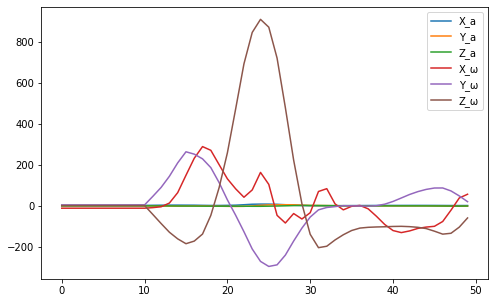

<Figure size 432x288 with 0 Axes>

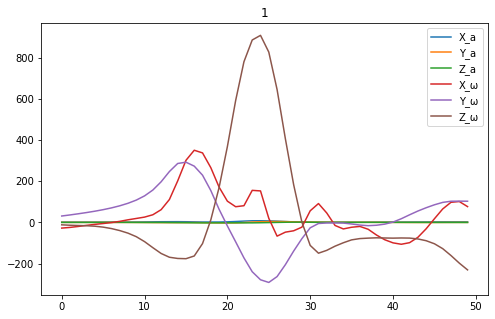

<Figure size 432x288 with 0 Axes>

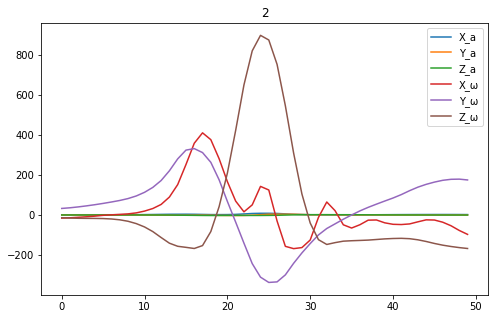

<Figure size 432x288 with 0 Axes>

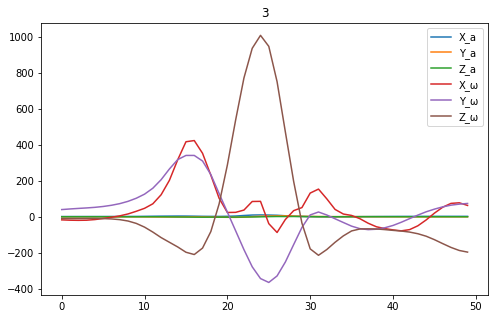

<Figure size 432x288 with 0 Axes>

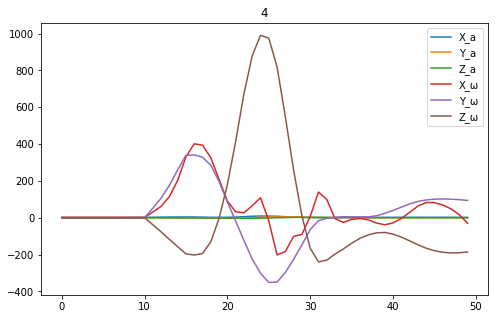

<Figure size 432x288 with 0 Axes>

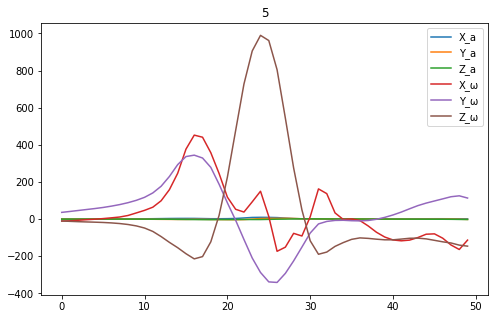

<Figure size 432x288 with 0 Axes>

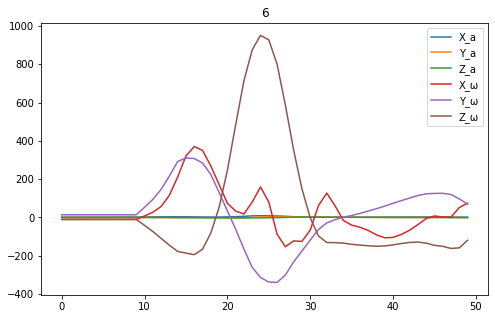

<Figure size 432x288 with 0 Axes>

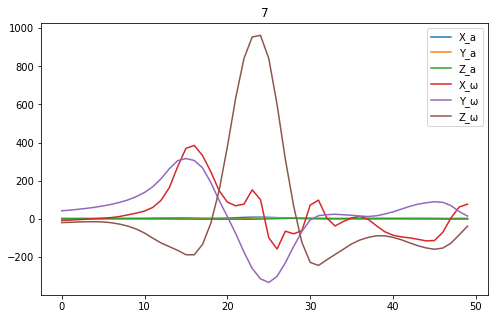

<Figure size 432x288 with 0 Axes>

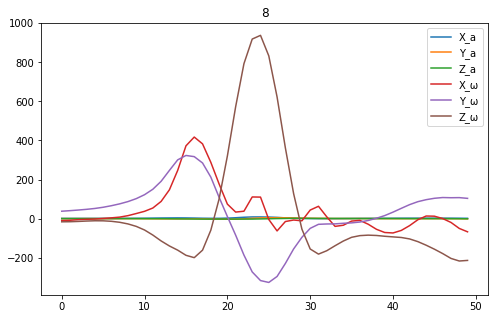

<Figure size 432x288 with 0 Axes>

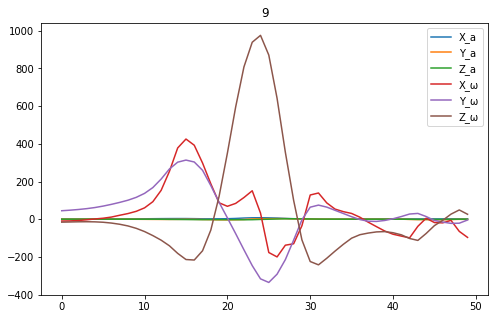

<Figure size 432x288 with 0 Axes>

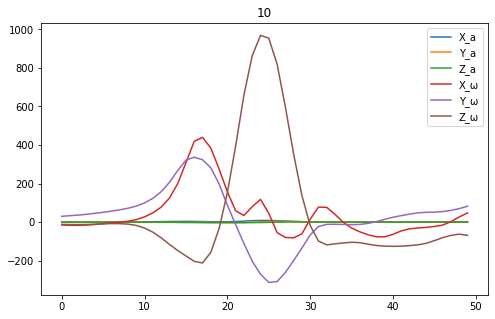

<Figure size 432x288 with 0 Axes>

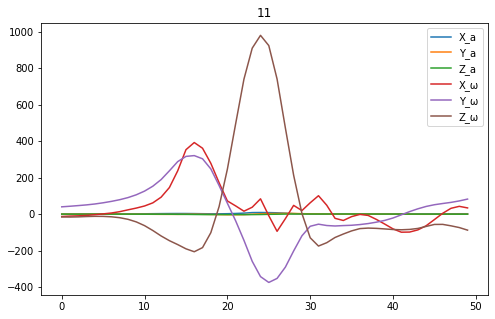

<Figure size 432x288 with 0 Axes>

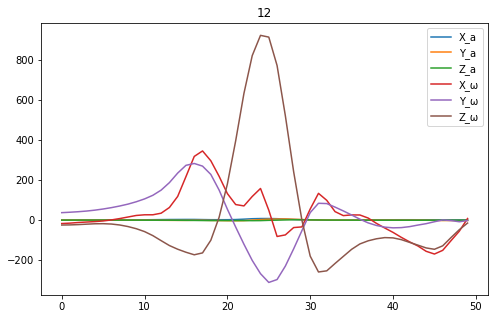

<Figure size 432x288 with 0 Axes>

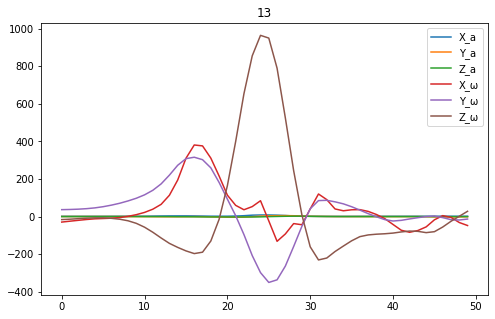

<Figure size 432x288 with 0 Axes>

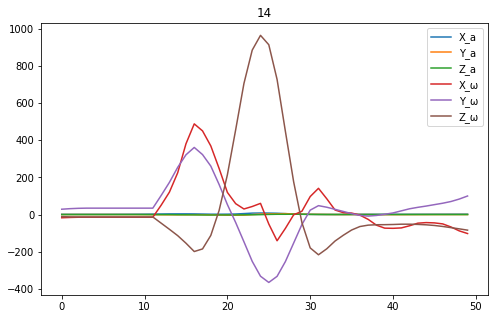

<Figure size 432x288 with 0 Axes>

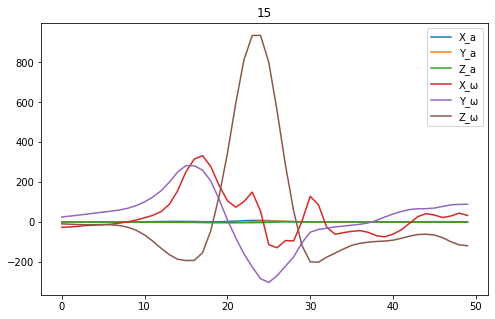

<Figure size 432x288 with 0 Axes>

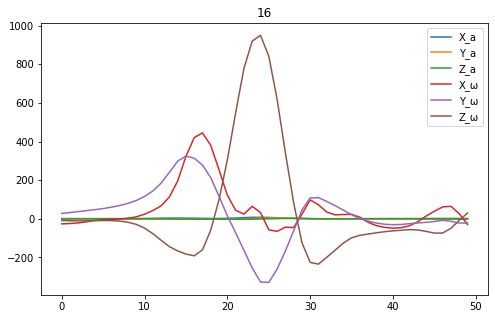

<Figure size 432x288 with 0 Axes>

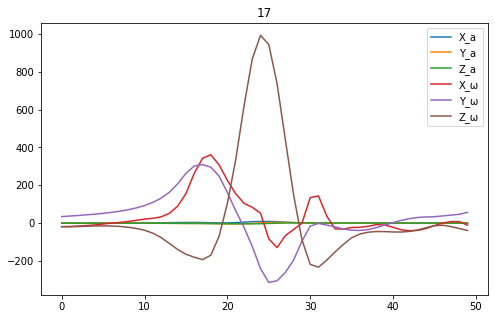

<Figure size 432x288 with 0 Axes>

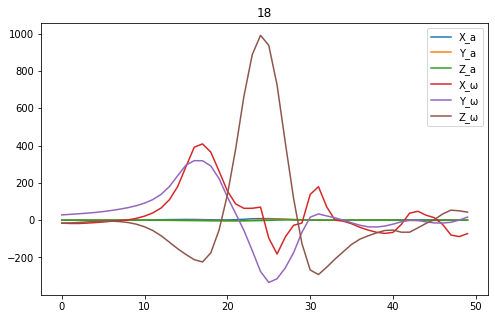

<Figure size 432x288 with 0 Axes>

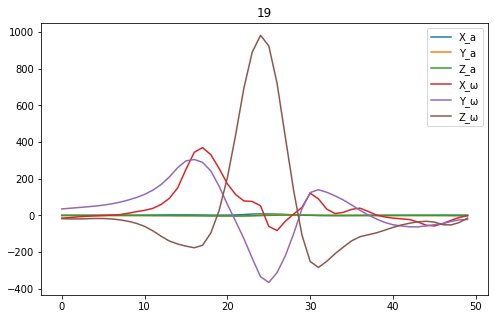

<Figure size 432x288 with 0 Axes>

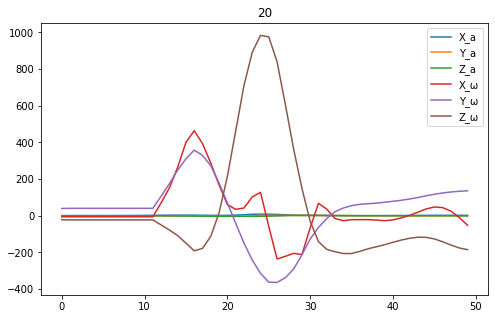

<Figure size 432x288 with 0 Axes>

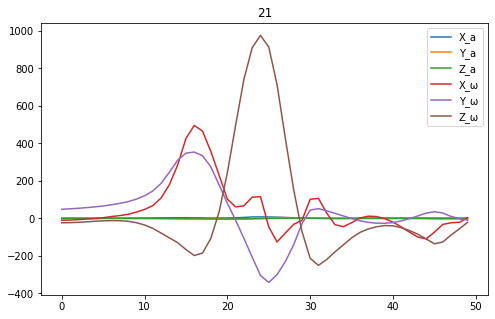

<Figure size 432x288 with 0 Axes>

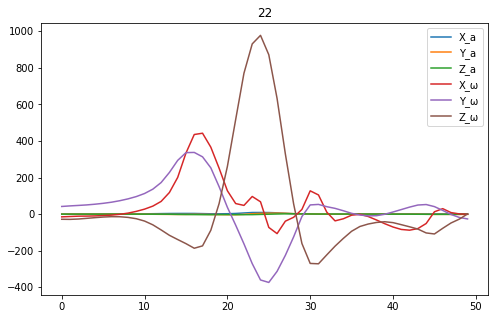

<Figure size 432x288 with 0 Axes>

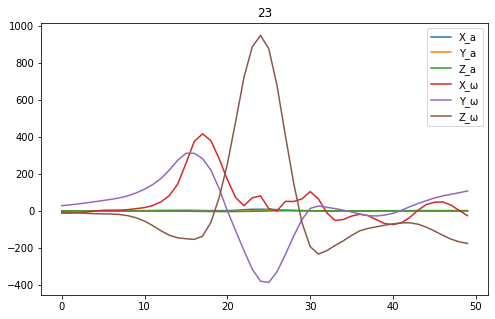

<Figure size 432x288 with 0 Axes>

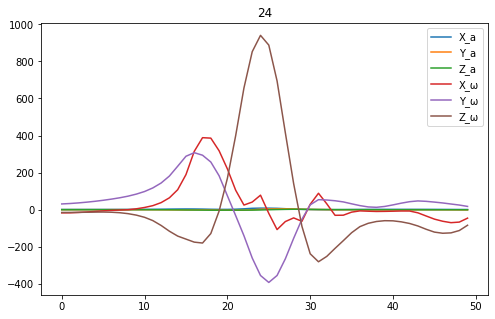

<Figure size 432x288 with 0 Axes>

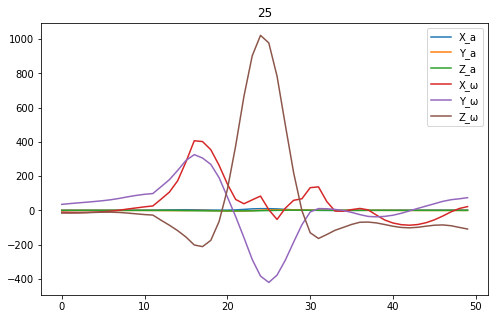

<Figure size 432x288 with 0 Axes>

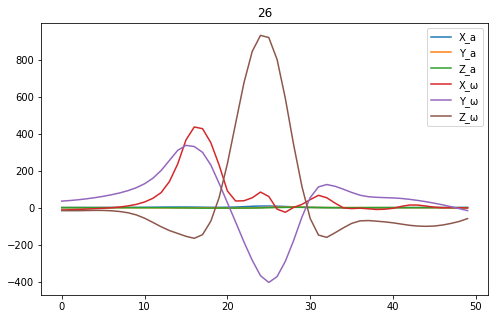

<Figure size 432x288 with 0 Axes>

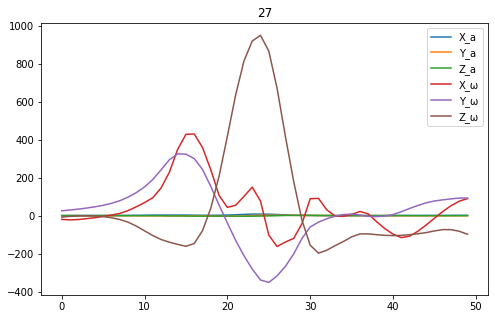

<Figure size 432x288 with 0 Axes>

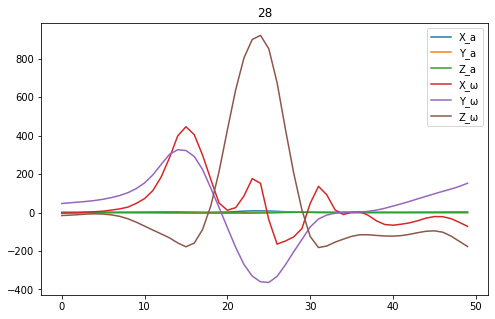

<Figure size 432x288 with 0 Axes>

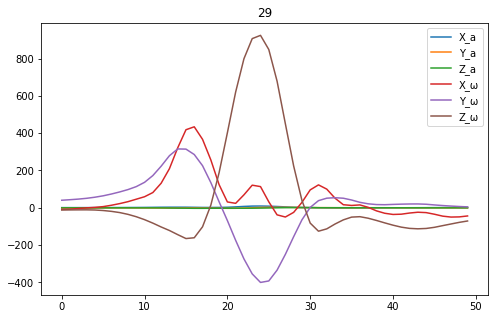

<Figure size 432x288 with 0 Axes>

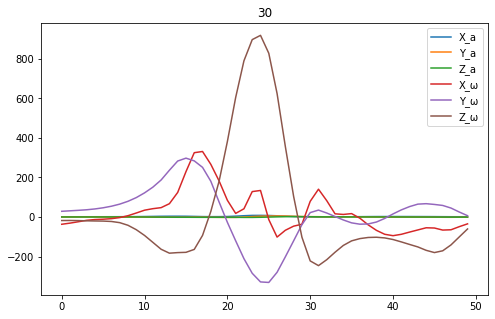

<Figure size 432x288 with 0 Axes>

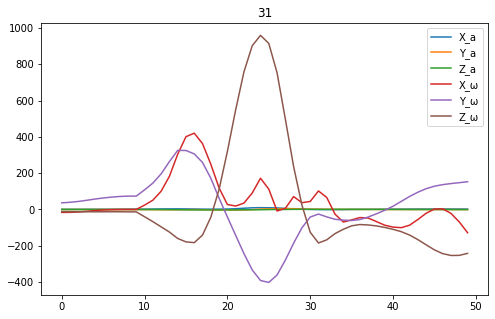

<Figure size 432x288 with 0 Axes>

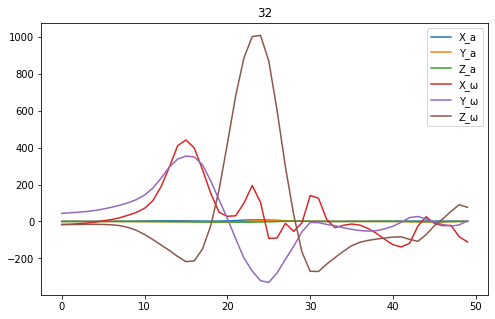

<Figure size 432x288 with 0 Axes>

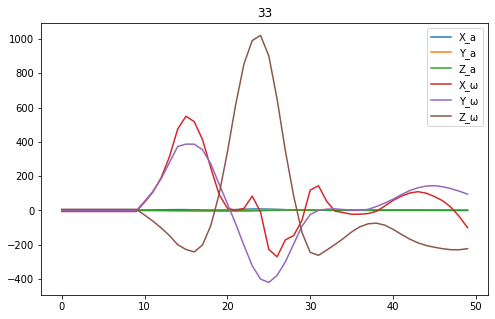

<Figure size 432x288 with 0 Axes>

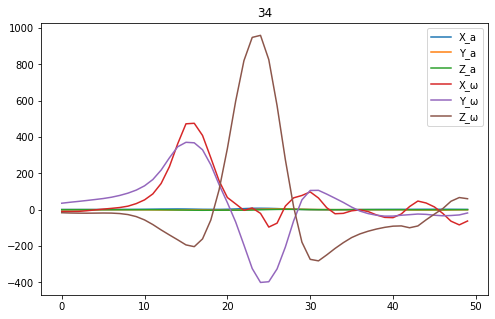

<Figure size 432x288 with 0 Axes>

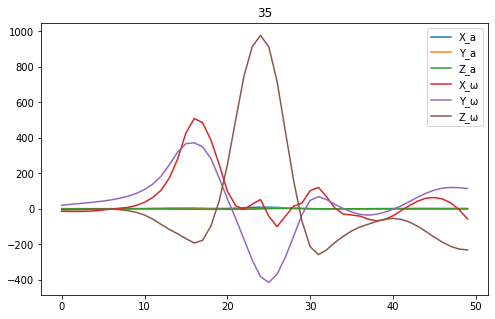

<Figure size 432x288 with 0 Axes>

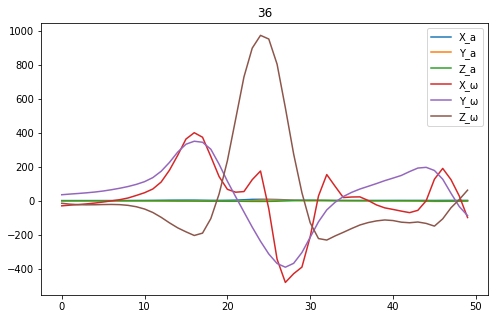

<Figure size 432x288 with 0 Axes>

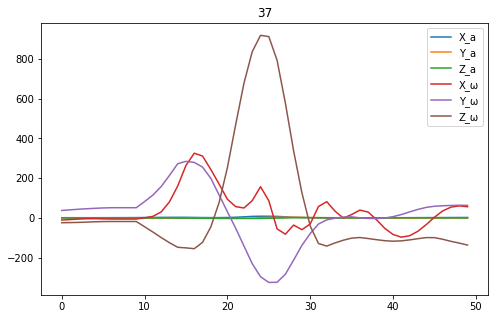

<Figure size 432x288 with 0 Axes>

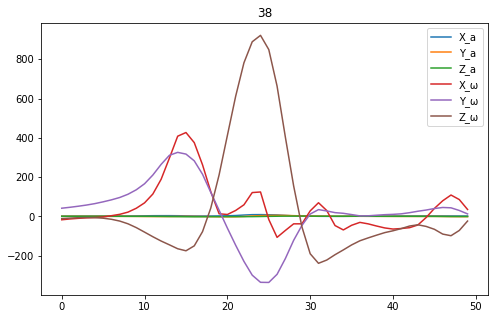

<Figure size 432x288 with 0 Axes>

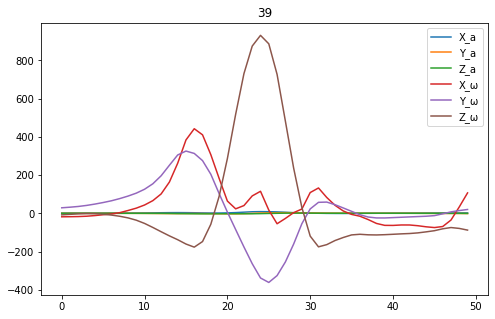

<Figure size 432x288 with 0 Axes>

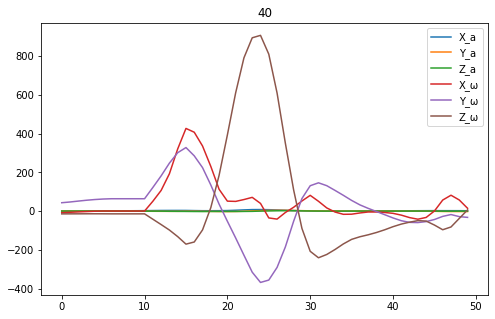

<Figure size 432x288 with 0 Axes>

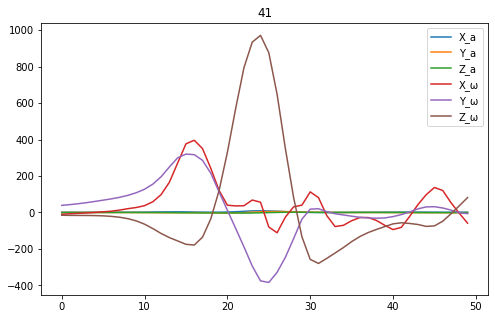

<Figure size 432x288 with 0 Axes>

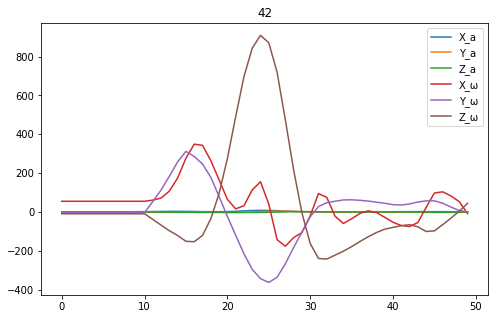

<Figure size 432x288 with 0 Axes>

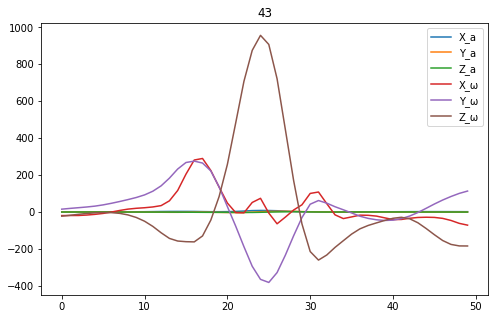

<Figure size 432x288 with 0 Axes>

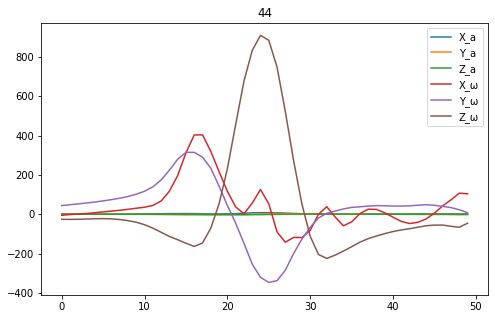

<Figure size 432x288 with 0 Axes>

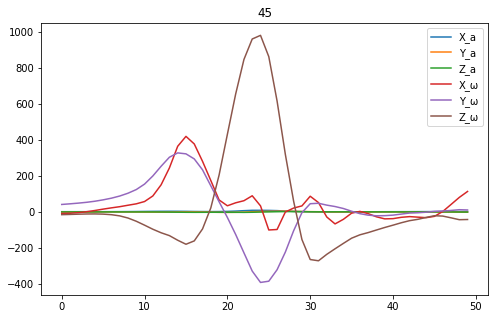

<Figure size 432x288 with 0 Axes>

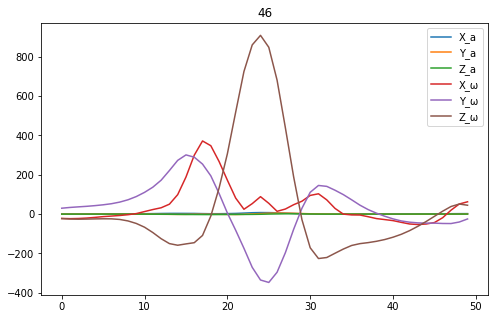

<Figure size 432x288 with 0 Axes>

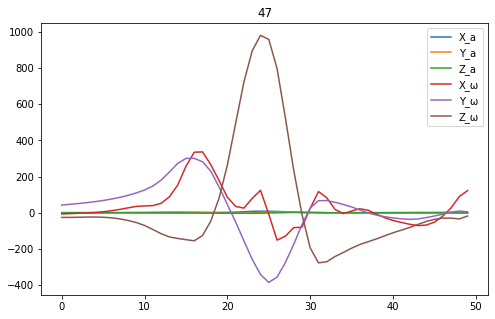

<Figure size 432x288 with 0 Axes>

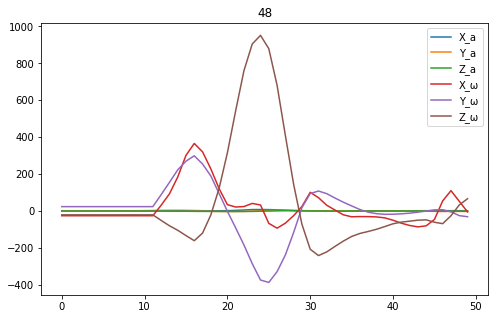

<Figure size 432x288 with 0 Axes>

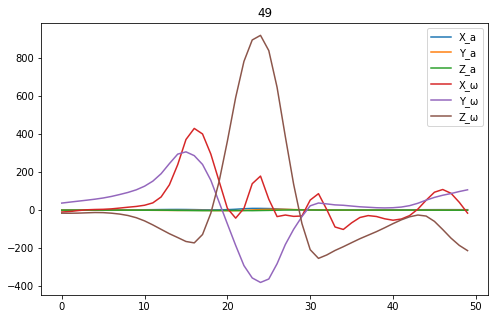

<Figure size 432x288 with 0 Axes>

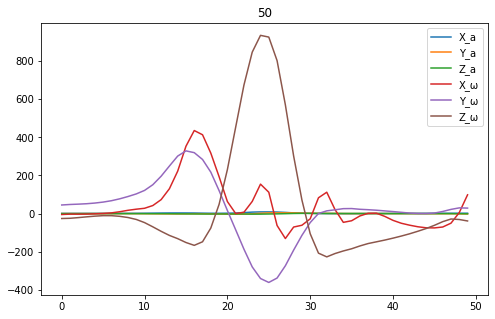

<Figure size 432x288 with 0 Axes>

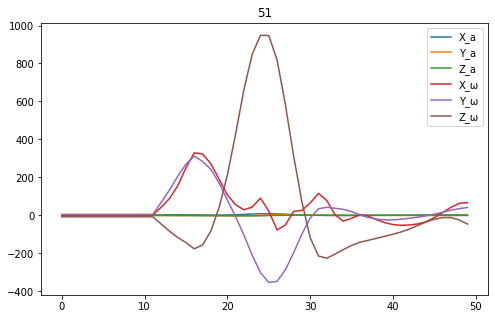

<Figure size 432x288 with 0 Axes>

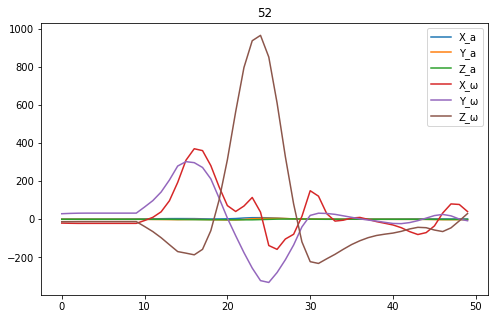

<Figure size 432x288 with 0 Axes>

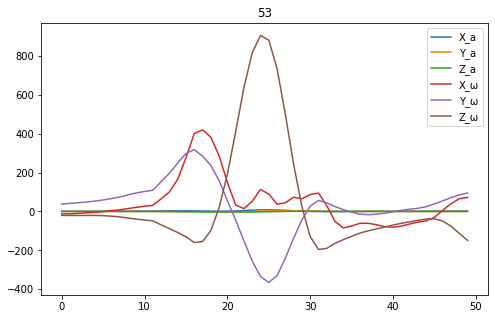

<Figure size 432x288 with 0 Axes>

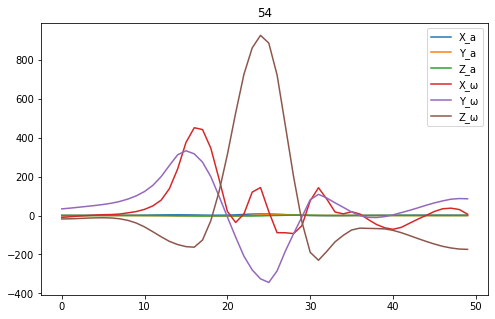

<Figure size 432x288 with 0 Axes>

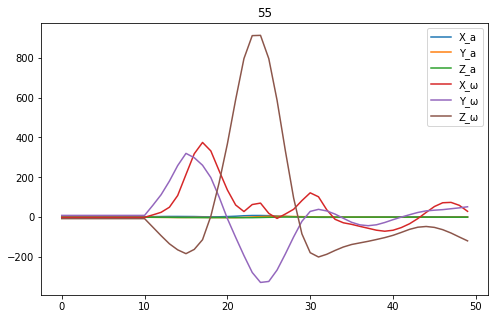

<Figure size 432x288 with 0 Axes>

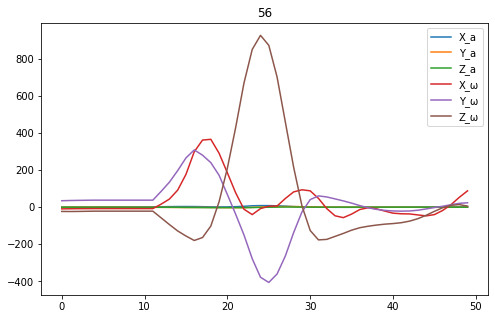

<Figure size 432x288 with 0 Axes>

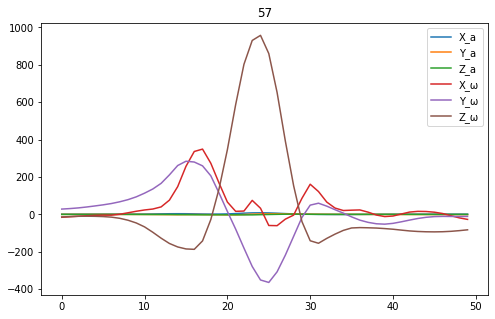

<Figure size 432x288 with 0 Axes>

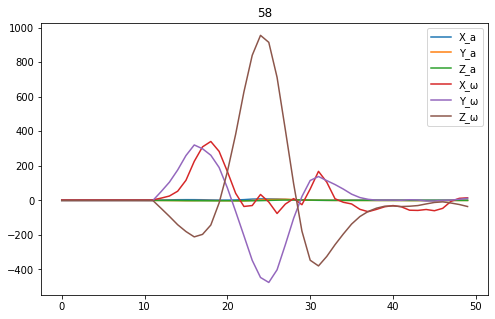

<Figure size 432x288 with 0 Axes>

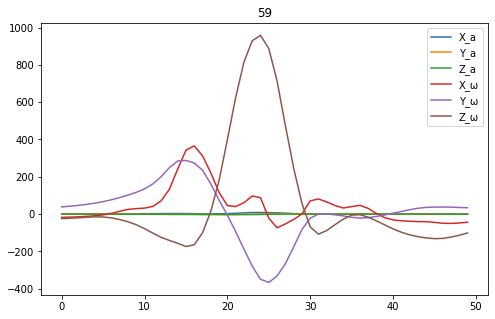

<Figure size 432x288 with 0 Axes>

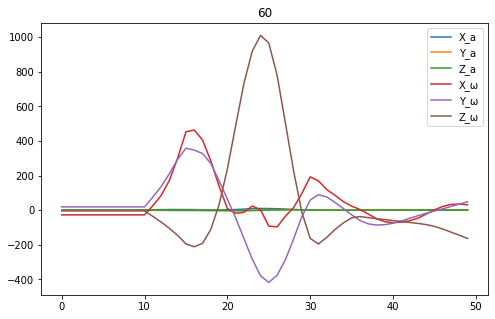

<Figure size 432x288 with 0 Axes>

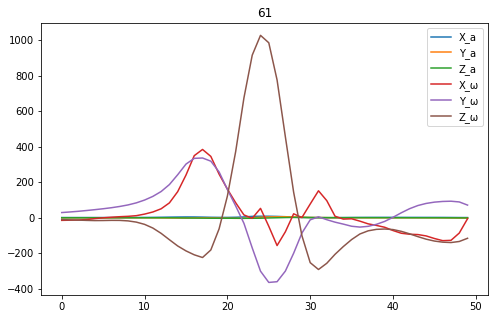

<Figure size 432x288 with 0 Axes>

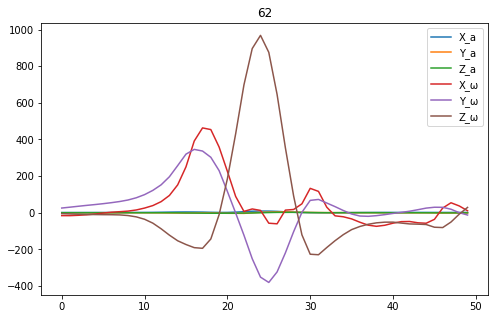

<Figure size 432x288 with 0 Axes>

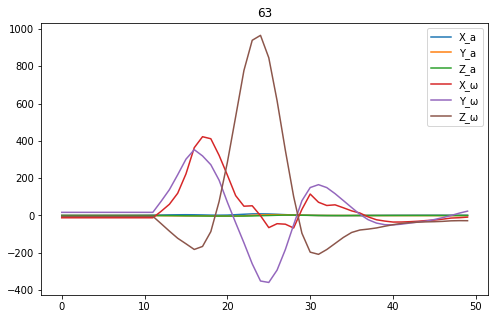

<Figure size 432x288 with 0 Axes>

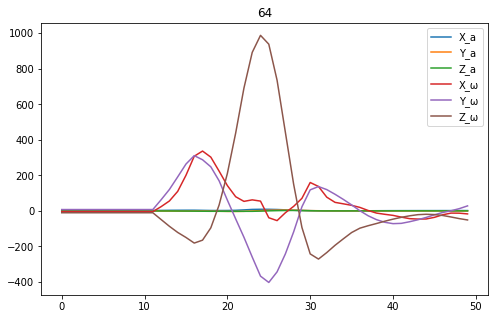

<Figure size 432x288 with 0 Axes>

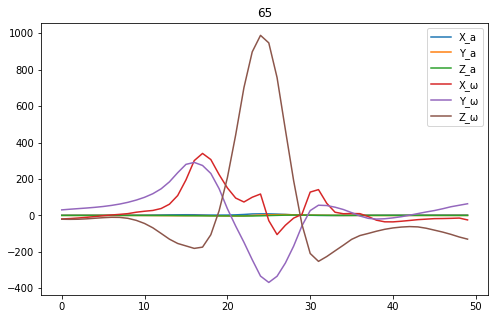

<Figure size 432x288 with 0 Axes>

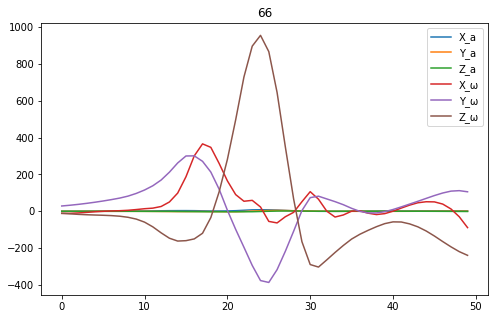

<Figure size 432x288 with 0 Axes>

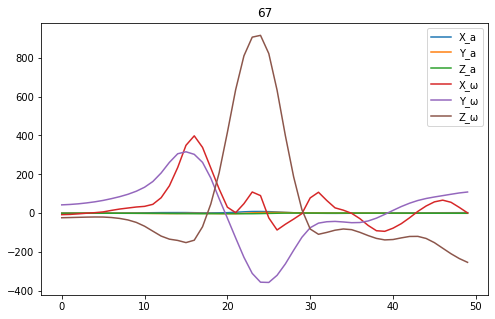

<Figure size 432x288 with 0 Axes>

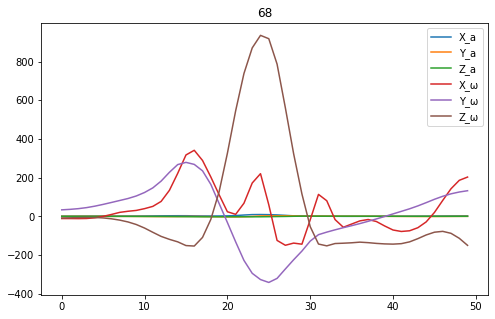

<Figure size 432x288 with 0 Axes>

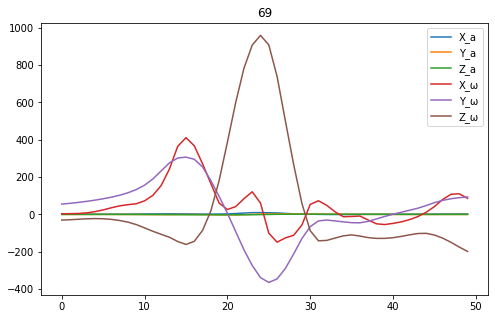

<Figure size 432x288 with 0 Axes>

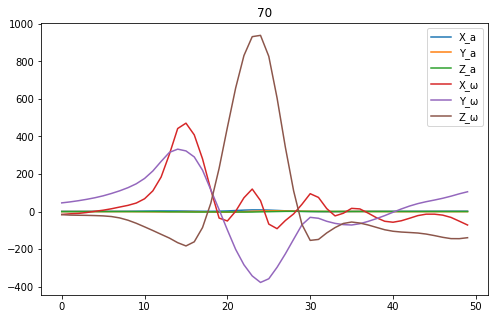

<Figure size 432x288 with 0 Axes>

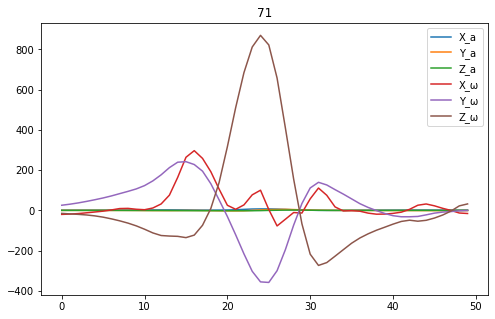

<Figure size 432x288 with 0 Axes>

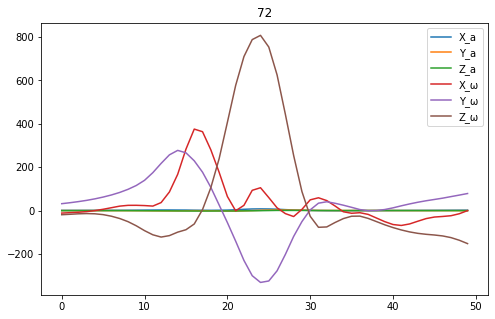

<Figure size 432x288 with 0 Axes>

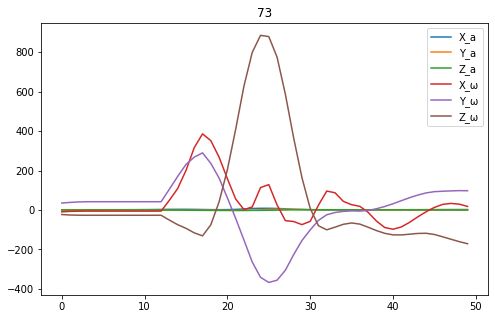

<Figure size 432x288 with 0 Axes>

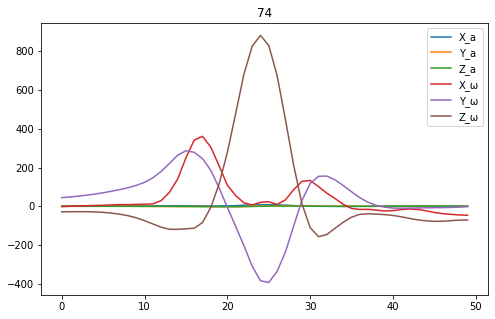

<Figure size 432x288 with 0 Axes>

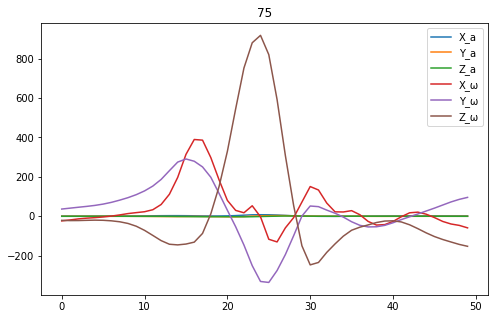

<Figure size 432x288 with 0 Axes>

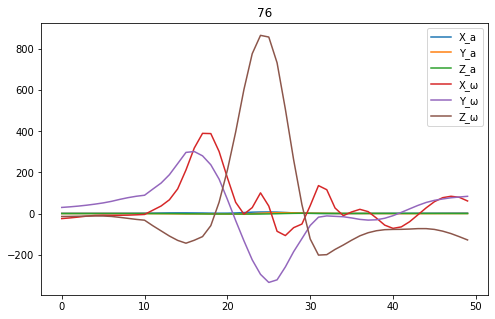

<Figure size 432x288 with 0 Axes>

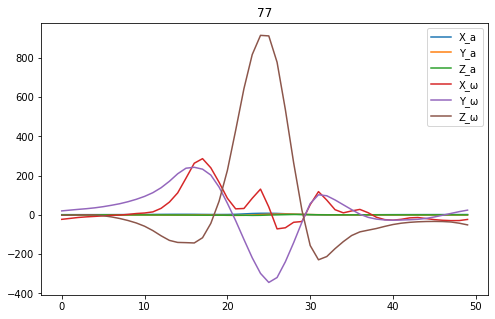

<Figure size 432x288 with 0 Axes>

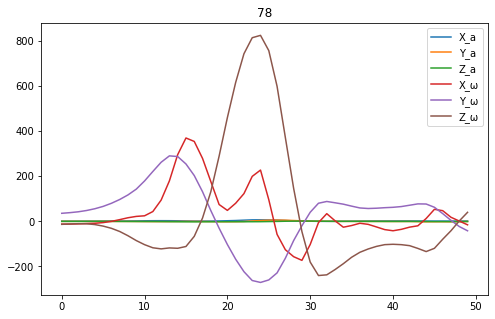

<Figure size 432x288 with 0 Axes>

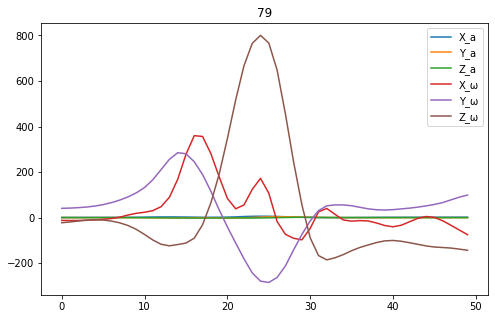

<Figure size 432x288 with 0 Axes>

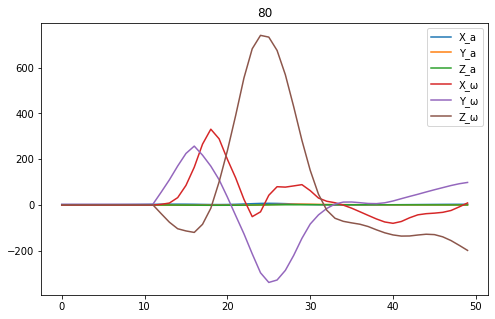

<Figure size 432x288 with 0 Axes>

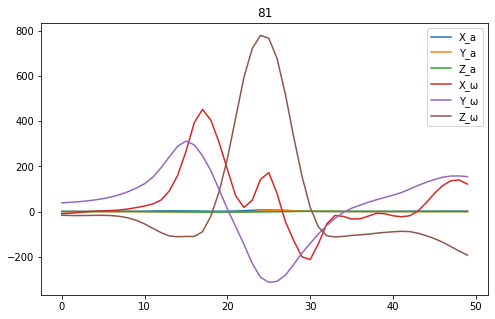

<Figure size 432x288 with 0 Axes>

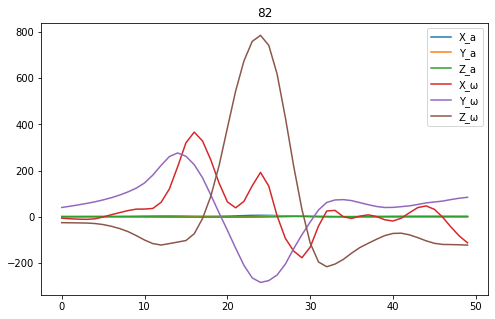

<Figure size 432x288 with 0 Axes>

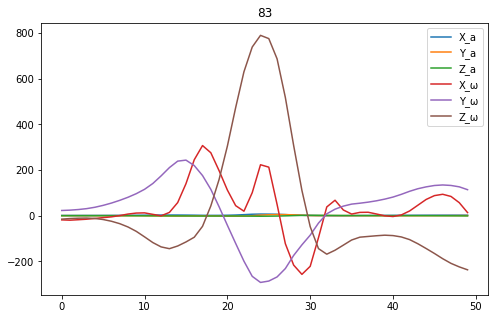

<Figure size 432x288 with 0 Axes>

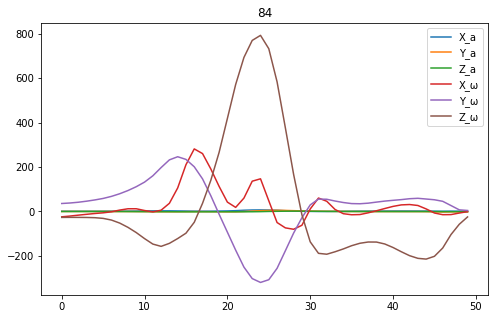

<Figure size 432x288 with 0 Axes>

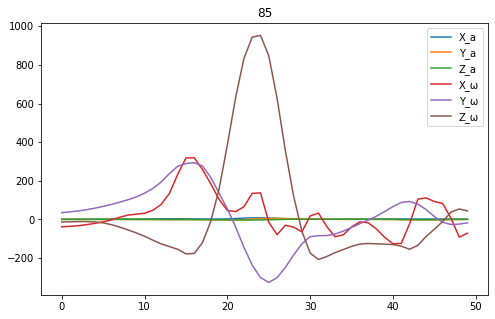

<Figure size 432x288 with 0 Axes>

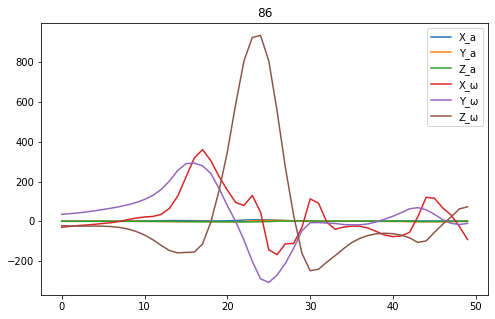

<Figure size 432x288 with 0 Axes>

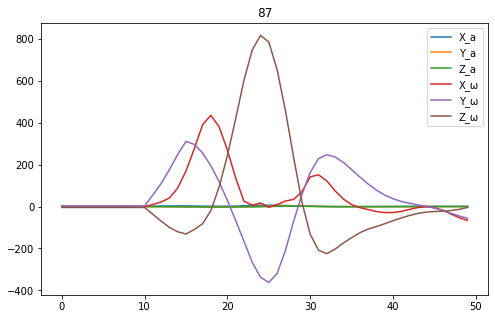

<Figure size 432x288 with 0 Axes>

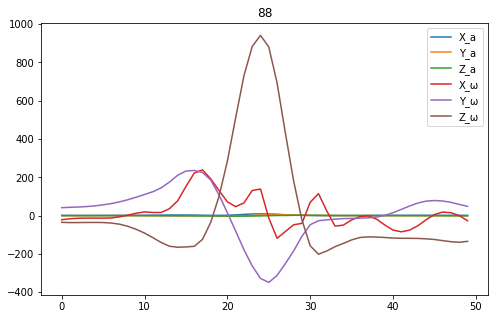

<Figure size 432x288 with 0 Axes>

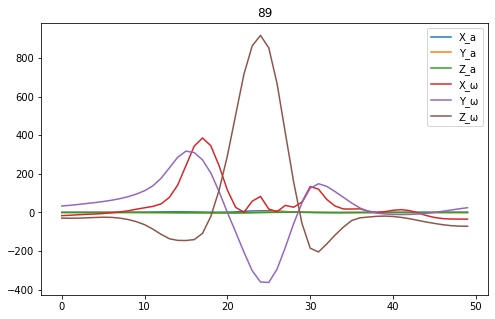

<Figure size 432x288 with 0 Axes>

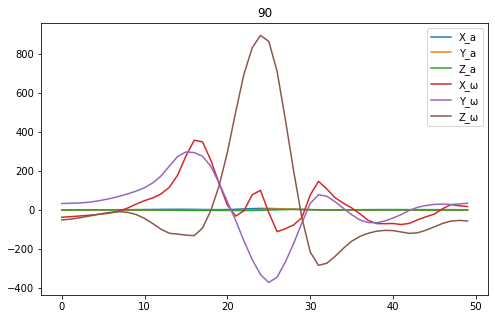

<Figure size 432x288 with 0 Axes>

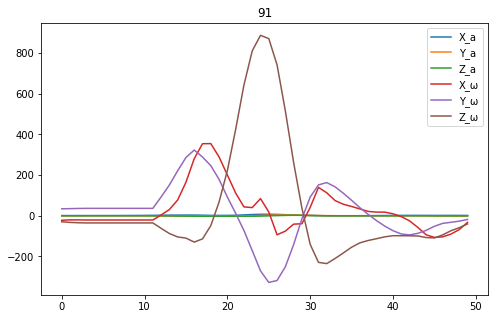

<Figure size 432x288 with 0 Axes>

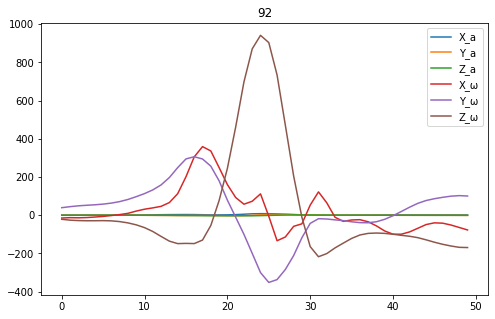

<Figure size 432x288 with 0 Axes>

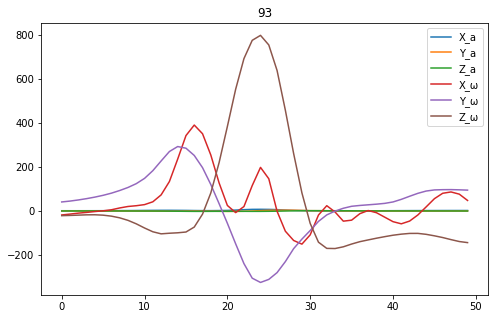

<Figure size 432x288 with 0 Axes>

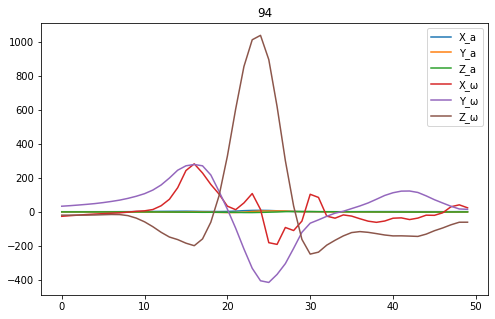

<Figure size 432x288 with 0 Axes>

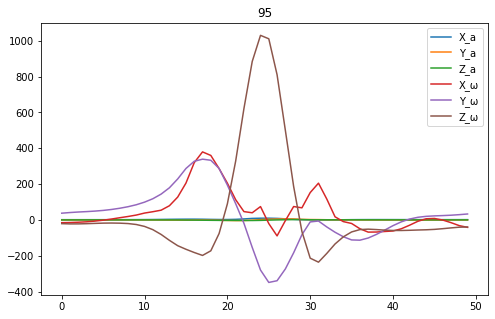

<Figure size 432x288 with 0 Axes>

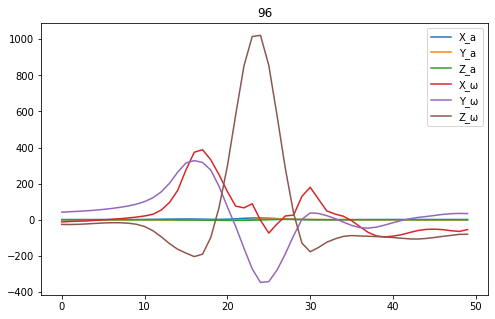

<Figure size 432x288 with 0 Axes>

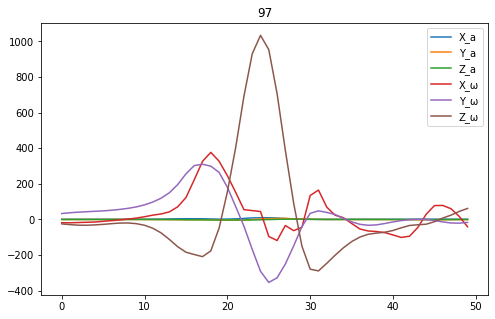

<Figure size 432x288 with 0 Axes>

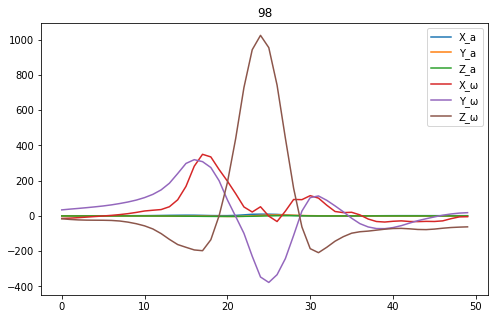

<Figure size 432x288 with 0 Axes>

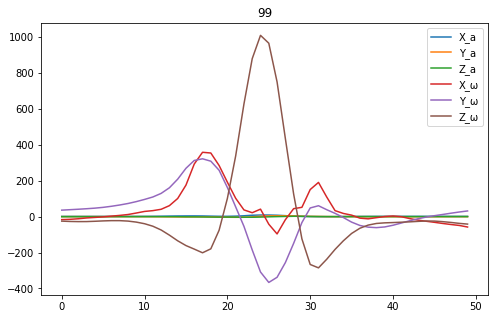

<Figure size 432x288 with 0 Axes>

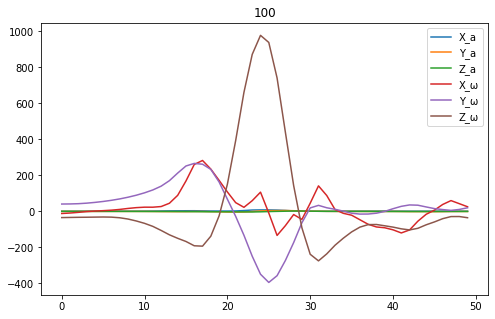

<Figure size 432x288 with 0 Axes>

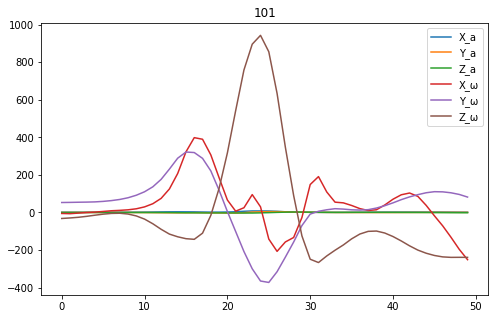

<Figure size 432x288 with 0 Axes>

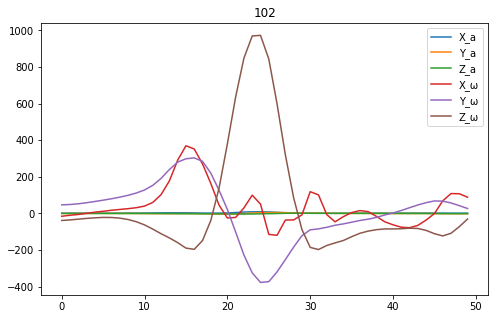

<Figure size 432x288 with 0 Axes>

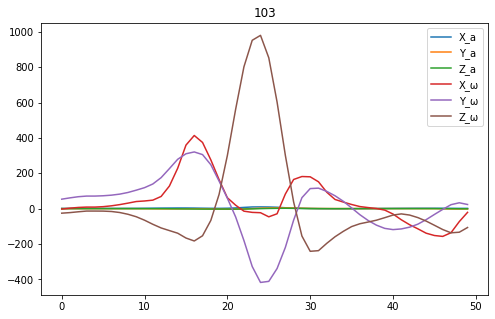

<Figure size 432x288 with 0 Axes>

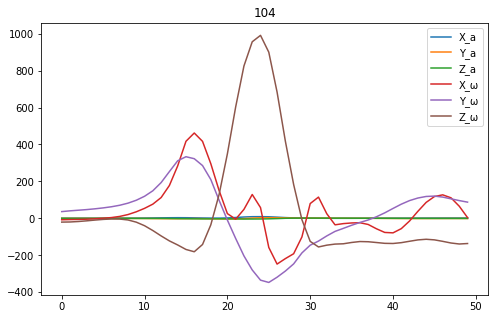

<Figure size 432x288 with 0 Axes>

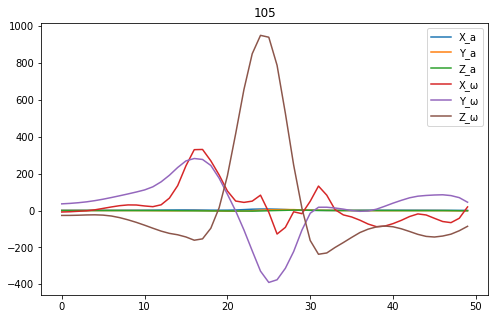

<Figure size 432x288 with 0 Axes>

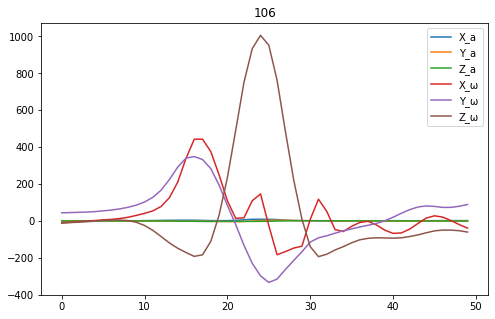

<Figure size 432x288 with 0 Axes>

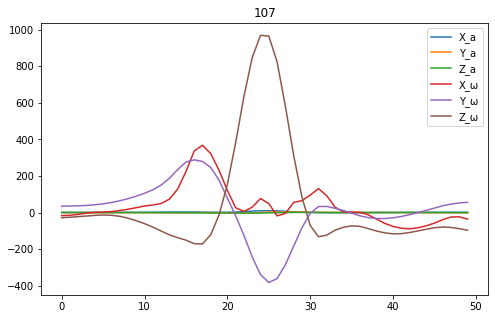

<Figure size 432x288 with 0 Axes>

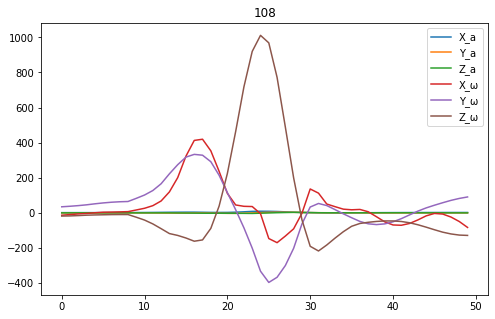

<Figure size 432x288 with 0 Axes>

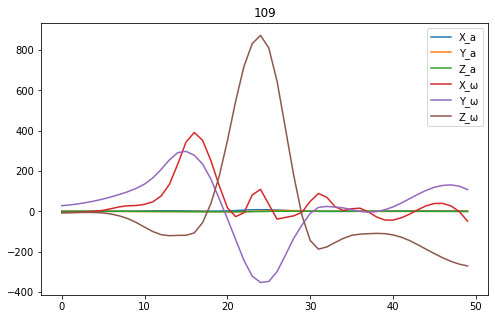

<Figure size 432x288 with 0 Axes>

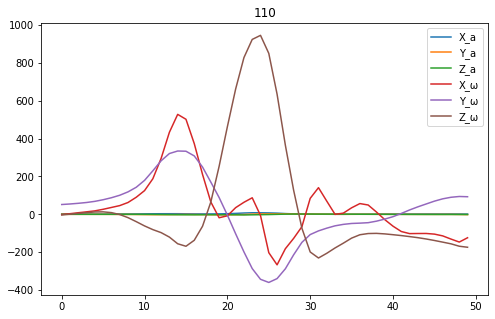

<Figure size 432x288 with 0 Axes>

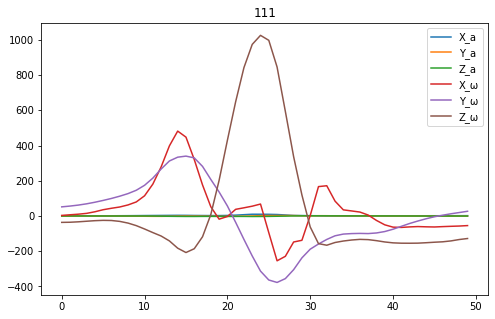

<Figure size 432x288 with 0 Axes>

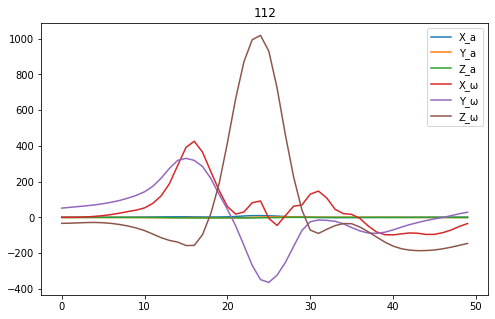

<Figure size 432x288 with 0 Axes>

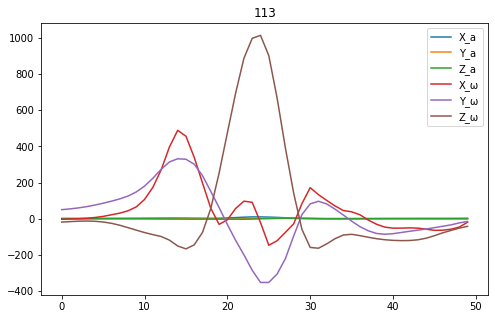

<Figure size 432x288 with 0 Axes>

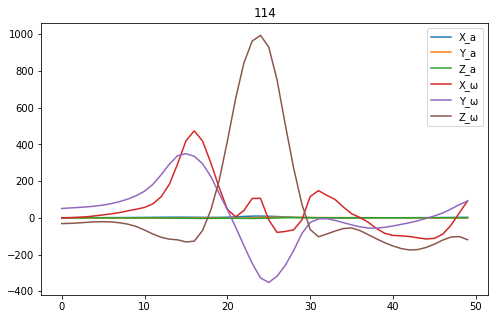

<Figure size 432x288 with 0 Axes>

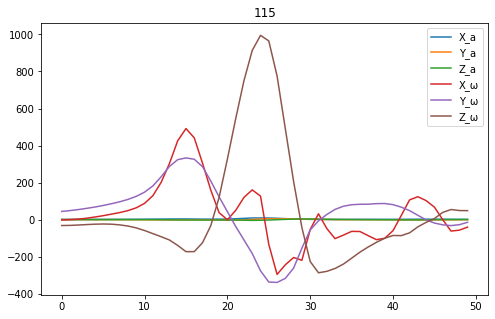

<Figure size 432x288 with 0 Axes>

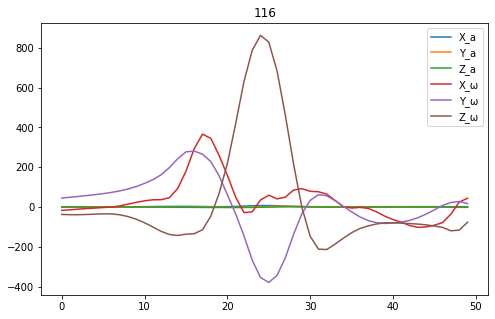

<Figure size 432x288 with 0 Axes>

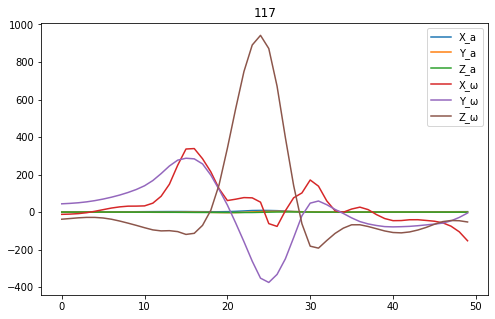

<Figure size 432x288 with 0 Axes>

In [35]:
for i in range(len(df)):
    df[i].plot(figsize=(8,5),title=i)
    plt.show()
    plt.clf()

In [36]:
df_save = pd.DataFrame()
for i in range(0,len(df)):
    df_save = df_save.append(df[i])

In [37]:
df_save

X_a       Y_a       Z_a         X_ω        Y_ω        Z_ω
0   1.014063  0.025488 -0.149023  -11.707317   4.268293   1.341463
1   1.026367  0.041895 -0.153906  -11.707317   4.268293   1.341463
2   1.043066  0.039551 -0.158105  -11.707317   4.268293   1.341463
3   1.066504  0.044336 -0.155176  -11.707317   4.268293   1.341463
4   1.090234  0.034082 -0.131738  -11.707317   4.268293   1.341463
..       ...       ...       ...         ...        ...        ...
45  1.344824  0.085352 -0.158398  -48.658537 -63.975613 -64.829269
46  1.643262  0.116113 -0.227441  -57.121952 -58.609759 -50.707318
47  1.863965  0.215234 -0.283496  -74.975611 -46.658538 -44.902440
48  2.097754  0.303223 -0.367383 -105.060979 -28.304879 -45.975610
49  2.388281  0.297461 -0.389453 -152.792685  -4.963414 -52.634147

[5900 rows x 6 columns]

In [38]:
df_save.to_excel('lqf_fq_4_10_cut.xlsx')